# Argentina stats on novel COVID-19 pandemic #

#### The following notebook is based on https://worldometers.info data and https://github.com/CSSEGISandData data. COVID-19 is currently a global pandemic affecting 158 countries and territories around the world. 
#### The objective of this notebook is to provide updated information on Argentina's COVID-19 cases comparing it to other countries of the region and the world, and provide some statistical analysis on them.

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

confirmed_cases = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
recovered_cases = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")
death_cases     = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")

Argentina data will be recovered from sources in https://es.wikipedia.org/wiki/Pandemia_de_coronavirus_de_2020_en_Argentina as it contemplates more updated data, and is more specific than other data. Other data will be used for comparison.

In [29]:
arg_confirmed_cases = pd.read_csv("argentina_covid_19_data/argentina-Confirmed.csv", encoding = "ISO-8859-1")
arg_recovered_cases = pd.read_csv("argentina_covid_19_data/argentina-Recovered.csv", encoding = "ISO-8859-1")
arg_death_cases     = pd.read_csv("argentina_covid_19_data/argentina-Deaths.csv", encoding = "ISO-8859-1")

In [30]:
arg_confirmed = arg_confirmed_cases.loc[(arg_confirmed_cases['Country/Region'] == 'Argentina') 
                & (arg_confirmed_cases['Province/State'] == 'All')]

arg_confirmed = arg_confirmed.drop(['Province/State'], axis=1)
arg_confirmed = arg_confirmed.set_index('Country/Region')

total = 0
total_list = []
for index, rows in arg_confirmed.iterrows():
    for date, cases in rows.items():
        total += cases
        total_list.append({date: total})

tot_cases = np.diag(pd.DataFrame(total_list))
arg_confirmed_ts = arg_confirmed.copy()

i = 0
for index, rows in arg_confirmed_ts.iterrows():
    print(index)
    for date, cases in rows.items():
        arg_confirmed_ts.at[index, date] = tot_cases[i]
        i += 1
    
tot_days = np.size(arg_confirmed_ts, axis = 1)
arg_confirmed_ts

Argentina


,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
Country/Region,,,,,,,,,,,,,,
Argentina,1,1,2,8,9,12,17,19,21,31,34,45,56,65


In [31]:
from IPython.display import Markdown

Markdown("""
Argentina's outbreak started at 03/03/2020, when the first case was confirmed in Ciudad de Buenos Aires. The current total is {total} 
""".format(total=total))


Argentina's outbreak started at 03/03/2020, when the first case was confirmed in Ciudad de Buenos Aires. The current total is 65 


## Argentina and other countries in the region

We will now compare Argentina and all latin-american countries in the region, to see the progress that the virus has made on the region

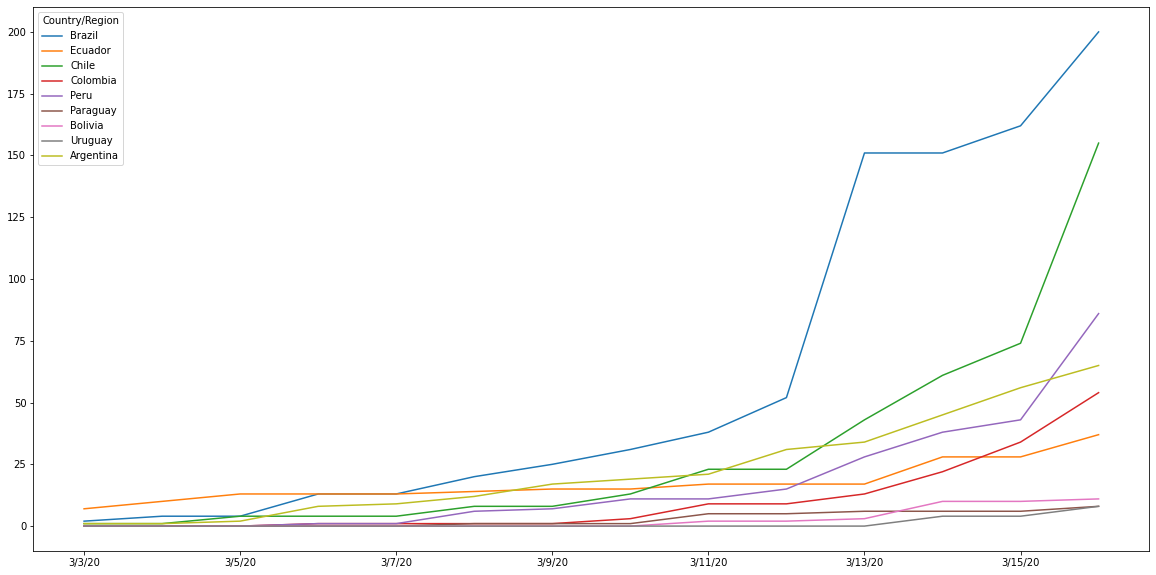

In [62]:
latam_countries = ['Brazil', 'Chile', 'Uruguay', 'Bolivia', 'Paraguay', 'Ecuador', 'Peru', 'Venezeula', 'Colombia']
latam_confirmed_cases = confirmed_cases.loc[(confirmed_cases['Country/Region']).isin(latam_countries)]

latam_confirmed_cases = latam_confirmed_cases.drop(['Province/State', 'Lat', 'Long'], axis=1)
latam_confirmed_cases = latam_confirmed_cases.set_index('Country/Region')
latam_confirmed_cases = latam_confirmed_cases.transpose()
latam_confirmed_cases = latam_confirmed_cases[41:]
latam_confirmed_cases = latam_confirmed_cases.transpose().append(arg_confirmed_ts).transpose()
latam_confirmed_cases.plot(figsize=(20,10))

#### Total confirmed cases over 1M population

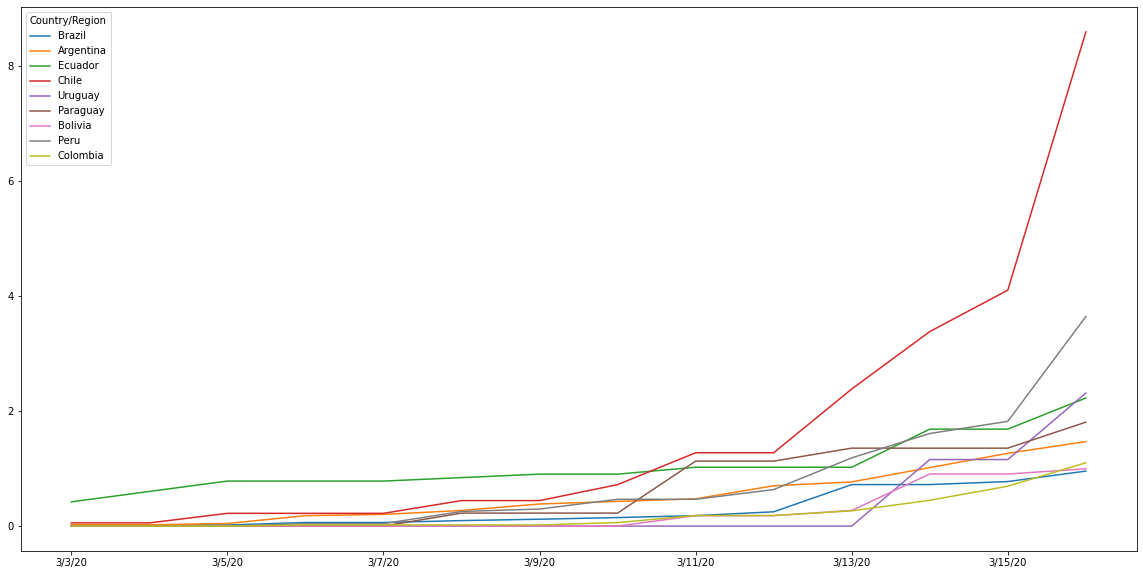

In [64]:
total_populations = {
    'Brazil': 209.3,
    'Argentina': 44.27,
    'Ecuador': 16.62,
    'Chile': 18.05,
    'Uruguay': 3.46,
    'Paraguay': 4.43,
    'Bolivia': 11.05,
    'Peru': 23.62,
    'Venezeula': 31.98,
    'Colombia': 49.07
}

latam_confirmed_cases = latam_confirmed_cases.transpose()
latam_conf_cases_by_pop = pd.DataFrame()
for country, pop in total_populations.items():
    country_cases = latam_confirmed_cases.loc[latam_confirmed_cases.index == country]
    latam_conf_cases_by_pop = latam_conf_cases_by_pop.append(country_cases.div(pop))
    
latam_conf_cases_by_pop.transpose().plot(figsize=(20,10))

## Argentina and european countries

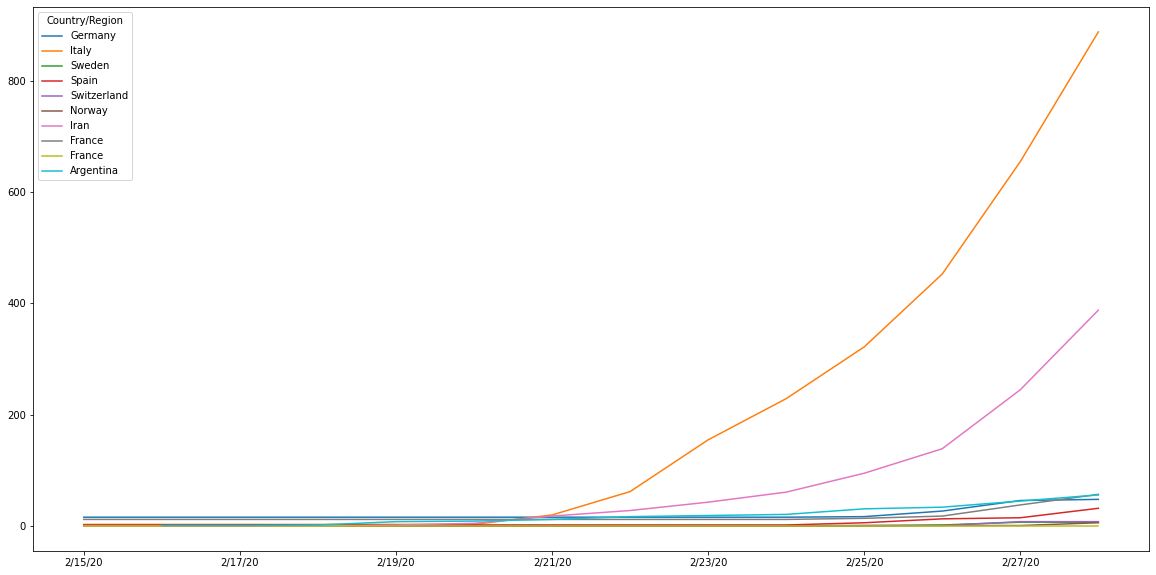

In [66]:
euro_countries = ['Italy', 'Iran', 'Spain', 'Germany', 'France', 'Switzerland', 'UK', 'Netherlands', 'Norway', 'Sweden']
euro_confirmed_cases = confirmed_cases.loc[(confirmed_cases['Country/Region']).isin(euro_countries)]
euro_confirmed_cases = euro_confirmed_cases[:9]
euro_confirmed_cases = euro_confirmed_cases.drop(['Province/State', 'Lat', 'Long'], axis = 1)
euro_confirmed_cases = euro_confirmed_cases.set_index('Country/Region')
euro_confirmed_cases = euro_confirmed_cases.transpose()

euro_confirmed_cases = euro_confirmed_cases[24:]
euro_confirmed_cases = euro_confirmed_cases.transpose().append(arg_confirmed_ts).transpose()
euro_confirmed_cases['Argentina'] = euro_confirmed_cases['Argentina'].shift(-16)
euro_confirmed_cases = euro_confirmed_cases[:tot_days]
euro_confirmed_cases.plot(figsize=(20,10))


#### Total confirmed cases over 1M population

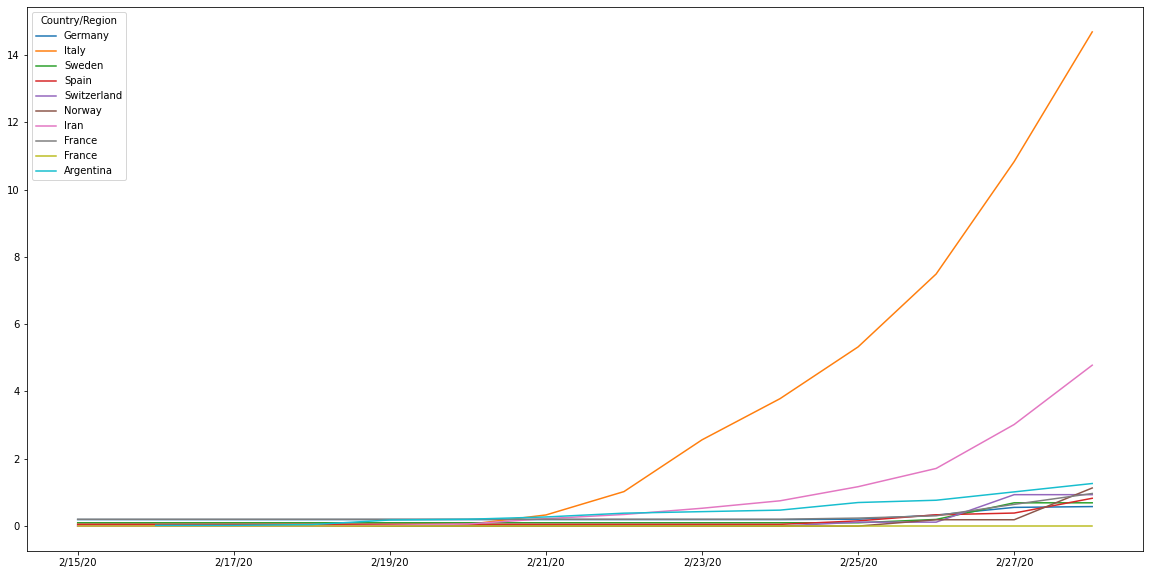

In [67]:
total_populations_eu = {
    'Germany': 82.79,
    'Italy': 60.48,
    'Sweden': 10.12,
    'Spain': 38.73,
    'Switzerland': 8.57,
    'Norway': 5.3,
    'Iran': 81.16,
    'France': 58.85,
    'Argentina': 44.27,
}

euro_confirmed_cases = euro_confirmed_cases.transpose()
euro_conf_cases_by_pop = pd.DataFrame()
for country, pop in total_populations_eu.items():
    country_cases = euro_confirmed_cases.loc[euro_confirmed_cases.index == country]
    euro_conf_cases_by_pop = euro_conf_cases_by_pop.append(country_cases.div(pop))
    
euro_conf_cases_by_pop.transpose().plot(figsize=(20,10))

## Predicting future outcomes with current data

### Incubation Period

Current data indicates that the mean incubation period is 5.2 days (95% confidence interval [CI], 4.1 to 7.0), with the 95th percentile of the distribution at 12.5 days. Data was taken from 425 confirmed cases

Source: https://www.nejm.org/doi/full/10.1056/NEJMoa2001316

If we take into account this numbers then we can try to predict when future cases will emerge, and consider different outcomes because of government actions.

See: https://www.usnews.com/news/world/articles/2020-03-15/argentina-to-close-its-borders-for-15-days-to-combat-coronavirus-president-fernandez-says
https://www.batimes.com.ar/news/argentina/argentina-to-close-schools-for-two-weeks-borders-to-visitors.phtml

Assuming a Gaussian distribution then for each day:

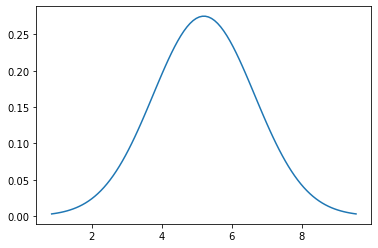

5.2 1.4500000000000002


In [132]:
import scipy.stats as stats

mu = 5.2
confirmed_cases = 425
max_mean = 7
min_mean = 4.1
sigma = (max_mean - min_mean)/2

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()
print(mean, sigma)

### Daily new cases histogram in Argentina

We now present a histogram of the daily cases in Argentina. We must then analyze this data to predict future outcomes based on the incubation period described before.

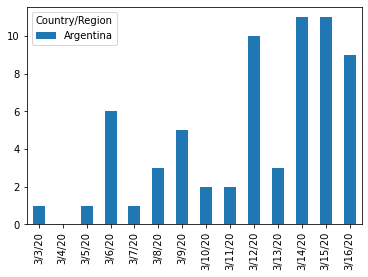

In [133]:
arg_confirmed.transpose().plot(kind="bar")

Assume the attack rate or transmissibility (Ro), which is, how rapidly the disease spreads, of 2. This represents the average number of people to which a single infected person will transmit the virus.

See: 

- https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3524675

- https://www.imperial.ac.uk/mrc-global-infectious-disease-analysis/news--wuhan-coronavirus/

We will also take into account the measures taken by the Argentinian government dated 15/03/2020 closing all borders and limiting work/school.

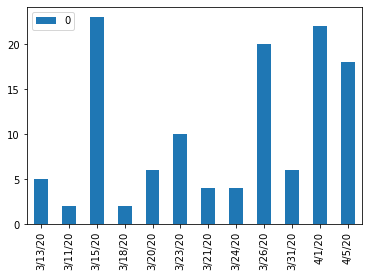

In [182]:
from datetime import datetime, timedelta

ro = 2
future_cases = {}
days_passed = 0

for index, rows in arg_confirmed.iterrows():
    for date, cases in rows.items():
        if str(cases).isnumeric():
            days_passed += 1
            gaussian = -1
            # Don't allow negative numbers (not realistic)
            while gaussian < 0:
                gaussian = np.random.normal(mu + days_passed, sigma)

            f_day = np.ceil(gaussian)
            _date = datetime.strptime(date, "%m/%d/%y")
            end_date = _date + timedelta(f_day)
            end_date = end_date.strftime("%-m/%-d/%y")
            future_cases[end_date] = ro*cases

dict_arg_confirmed = arg_confirmed.to_dict()
dict_arg_predicted = {}
for date, cases in future_cases.items():
    if date in dict_arg_confirmed:
        dict_arg_predicted[date] = dict_arg_confirmed[date]['Argentina'] + cases 
    else:
        dict_arg_predicted[date] =  cases

arg_confirmed_predicted = pd.DataFrame.from_dict(dict_arg_predicted, orient = "index")
arg_confirmed_predicted.plot(kind="bar")